# Boston_Housing - Regression Analysis

## Import TensorFlow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.16.2'

* GPU 설정 OFF

In [3]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

> ## 2) Data_Set Information

* <font color = 'blue'>'boston.csv' (506 * 14)</font>

 - CRIM: 범죄 발생률
 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
 -  INDUS: 비소매 상업 지역 비율
 - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
 - NOX: 일산화질소 농도
 - RM: 거주 목적 방 개수
 - AGE: 1940년 이전 건축된 주택 비율
 - DIS: 보스턴 5대 고용지역까지 거리
 - RAD: 고속도로 접근성
 - TAX: 10,000달러당 재산세율
 - PTRATIO: 교사와 학생 수 비율
 - B: 흑인 거주 비율
 - LSTAT: 하위 계층 비율
 - <font color = 'red'>PRICE: 주택 가격 -> 'y'

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) Standardization

 * train_data & test_data

In [6]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 2045) 

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [9]:
boston.summary()

Model: "Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

> ## 2) Model Compile

In [10]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

 * 약 8분

In [11]:
# %%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 308.4272 - mae: 14.6354 - val_loss: 43.3864 - val_mae: 3.9153
Epoch 2/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 29.6661 - mae: 3.7914 - val_loss: 27.7758 - val_mae: 2.9617
Epoch 3/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 14.6687 - mae: 2.9036 - val_loss: 20.1094 - val_mae: 2.6391
Epoch 4/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 14.2474 - mae: 2.7258 - val_loss: 19.0223 - val_mae: 2.8075
Epoch 5/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 13.8476 - mae: 2.5426 - val_loss: 19.2585 - val_mae: 2.5962
Epoch 6/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 12.2238 - mae: 2.3728 - val_loss: 18.9701 - val_mae: 2.4947
Epoch 7/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 15.1415 - mae: 2.5213 - val_loss: 21.1156 - val_mae: 2.6827
Epoch 8/500
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 13.5757 - mae: 2.3207 - val_loss: 16.0696 - val_mae: 2.4317
Epoch 9/500
323/

> ## 4) 학습 결과 시각화

* 전체 시각화

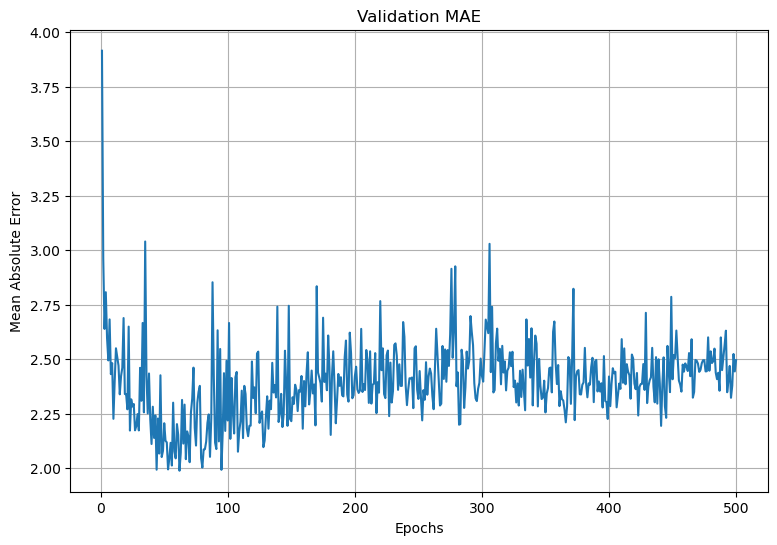

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

* 5번째 이후 MAE 확인

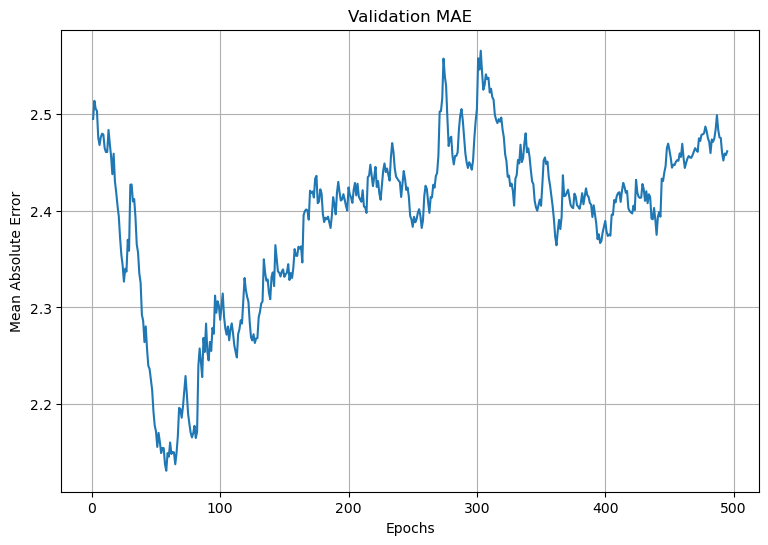

In [13]:
# 보기 편하게 스무딩해주자
# 스케일 차이가 큰 첫 5개 포인트는 제외하고
# 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체한다.
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [14]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5874 - mae: 2.3793 
MAE is : 2.749713182449341


> ## 6) Keras Session Clear

In [15]:
# 대용량 데이터 학습 시 GPU메모리 부족 에러 대응
# 모델 생성 후에는 꼭 클리어해주자.
from tensorflow.keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

* monitor : 모니터링 대상 성능
* mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience : 성능이 개선되지 않는 epoch 횟수

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae', 
                   mode = 'min', 
                   patience = 50, 
                   verbose = 1)

> ## 3) ModelCheckpoint( )

* 'best_boston.h5' : 최적모델이 저장될 경로
* save_best_only : 최적모델만 저장할지 지정

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5', 
                     monitor = 'val_mae', 
                     mode = 'min', 
                     save_best_only = True,
                     verbose = 1)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_boston.h5

> ## 4) Model Fit with callbacks

* callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [ ]:
# %%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

> ## 5) Best Model

In [ ]:
# !ls -l

> ## 6) Model Evaluate

In [ ]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')

In [ ]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test)

print('MAE is :',test_mae_score)

# The End